<a href="https://colab.research.google.com/github/Jilaneeshaikh/ML_with_Python_practice/blob/main/AusApparalSales4thQrt2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [3]:
data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [4]:
data.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [5]:
data.shape

(7560, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [7]:
data.dtypes

,0
Date,object
Time,object
State,object
Group,object
Unit,int64
Sales,int64


# **DATA CLEANING**

In [8]:
data.isna().sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [9]:
data.notna().sum()

,0
Date,7560
Time,7560
State,7560
Group,7560
Unit,7560
Sales,7560


In [10]:
data['Date']= pd.to_datetime(data['Date'])
data['Year']= data['Date'].dt.year
data['Month']= data['Date'].dt.month
data['Week']= data['Date'].dt.isocalendar().week
data['Quarter']=data['Date'].dt.quarter
data['Day']=data['Date'].dt.day

data

,Date,Time,State,Group,Unit,Sales,Year,Month,Week,Quarter,Day
0,2020-10-01,Morning,WA,Kids,8,20000,2020,10,40,4,1
1,2020-10-01,Morning,WA,Men,8,20000,2020,10,40,4,1
2,2020-10-01,Morning,WA,Women,4,10000,2020,10,40,4,1
3,2020-10-01,Morning,WA,Seniors,15,37500,2020,10,40,4,1
4,2020-10-01,Afternoon,WA,Kids,3,7500,2020,10,40,4,1
...,...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,2020,12,53,4,30
7556,2020-12-30,Evening,TAS,Kids,15,37500,2020,12,53,4,30
7557,2020-12-30,Evening,TAS,Men,15,37500,2020,12,53,4,30
7558,2020-12-30,Evening,TAS,Women,11,27500,2020,12,53,4,30


In [11]:
df = pd.get_dummies(data)

In [12]:
df.head()

,Date,Unit,Sales,Year,Month,Week,Quarter,Day,Time_ Afternoon,Time_ Evening,...,State_ NT,State_ QLD,State_ SA,State_ TAS,State_ VIC,State_ WA,Group_ Kids,Group_ Men,Group_ Seniors,Group_ Women
0,2020-10-01,8,20000,2020,10,40,4,1,False,False,...,False,False,False,False,False,True,True,False,False,False
1,2020-10-01,8,20000,2020,10,40,4,1,False,False,...,False,False,False,False,False,True,False,True,False,False
2,2020-10-01,4,10000,2020,10,40,4,1,False,False,...,False,False,False,False,False,True,False,False,False,True
3,2020-10-01,15,37500,2020,10,40,4,1,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2020-10-01,3,7500,2020,10,40,4,1,True,False,...,False,False,False,False,False,True,True,False,False,False


In [13]:
from sklearn import ensemble
from sklearn import preprocessing

In [14]:
#Label encoder to convert categorical value into int
leModel = preprocessing.LabelEncoder()
df['Date']= leModel.fit_transform(df['Date'])
leModel = preprocessing.LabelEncoder()

In [15]:
#veiw data type
df.dtypes

,0
Date,int64
Unit,int64
Sales,int64
Year,int32
Month,int32
Week,UInt32
Quarter,int32
Day,int32
Time_ Afternoon,bool
Time_ Evening,bool


# **Normalization:**

In [16]:
#Normalization
scaler = MinMaxScaler()
scaler.fit(df)
normalized_data = scaler.transform(df)
print(normalized_data)

[[0.         0.0952381  0.0952381  ... 0.         0.         0.        ]
 [0.         0.0952381  0.0952381  ... 1.         0.         0.        ]
 [0.         0.03174603 0.03174603 ... 0.         0.         1.        ]
 ...
 [1.         0.20634921 0.20634921 ... 1.         0.         0.        ]
 [1.         0.14285714 0.14285714 ... 0.         0.         1.        ]
 [1.         0.17460317 0.17460317 ... 0.         1.         0.        ]]


In [17]:
normalized_data

array([[0.        , 0.0952381 , 0.0952381 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0952381 , 0.0952381 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03174603, 0.03174603, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.20634921, 0.20634921, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.14285714, 0.14285714, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.17460317, 0.17460317, ..., 0.        , 1.        ,
        0.        ]])

In [18]:
#Mean and standard deviation
print(np.mean(normalized_data))
print(np.std(normalized_data))

0.25021317600682685
0.38482481895715737


In [19]:
#Group to columns sales and unit
df.groupby(['Sales', 'Unit'])

print(df.groupby(['Sales', 'Unit']).sum())

              Date    Year  Month   Week  Quarter   Day  Time_ Afternoon  \
Sales  Unit                                                                
5000   2      5626  262600   1430   6024      520  1856               44   
7500   3      7760  484800   2547  10732      960  3590               84   
10000  4      7136  424200   2236   9444      840  3266               71   
12500  5     14834  668620   3639  15388     1324  5295              108   
15000  6     16369  747400   4063  17176     1480  5849              132   
...            ...     ...    ...    ...      ...   ...              ...   
152500 61      664   18180    108    457       36   133                3   
155000 62      758   20200    120    511       40   168                6   
157500 63      942   26260    156    657       52   175                6   
160000 64      972   26260    156    662       52   205                1   
162500 65      856   22220    132    565       44   207                4   

           

In [20]:
#Group to sales and year
df.groupby(['Sales', 'Year'])

print(df.groupby(['Sales', 'Year']).sum())

              Date  Unit  Month   Week  Quarter   Day  Time_ Afternoon  \
Sales  Year                                                              
5000   2020   5626   260   1430   6024      520  1856               44   
7500   2020   7760   720   2547  10732      960  3590               84   
10000  2020   7136   840   2236   9444      840  3266               71   
12500  2020  14834  1655   3639  15388     1324  5295              108   
15000  2020  16369  2220   4063  17176     1480  5849              132   
...            ...   ...    ...    ...      ...   ...              ...   
152500 2020    664   549    108    457       36   133                3   
155000 2020    758   620    120    511       40   168                6   
157500 2020    942   819    156    657       52   175                6   
160000 2020    972   832    156    662       52   205                1   
162500 2020    856   715    132    565       44   207                4   

             Time_ Evening  Time_ Mor

In [21]:
#Group sales with sum,mean std of Unit
grp = df.groupby('Sales')

grp['Unit'].agg([np.sum, np.mean, np.std])

<ipython-input-21-65099f0d04ac>:4: FutureWarning: The provided callable <function sum at 0x7c866f5cd260> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grp['Unit'].agg([np.sum, np.mean, np.std])
<ipython-input-21-65099f0d04ac>:4: FutureWarning: The provided callable <function mean at 0x7c866f5ce340> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp['Unit'].agg([np.sum, np.mean, np.std])
<ipython-input-21-65099f0d04ac>:4: FutureWarning: The provided callable <function std at 0x7c866f5ce480> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  grp['Unit'].agg([np.sum, np.mean, np.std])


,sum,mean,std
Sales,,,
5000,260,2.0,0.0
7500,720,3.0,0.0
10000,840,4.0,0.0
12500,1655,5.0,0.0
15000,2220,6.0,0.0
...,...,...,...
152500,549,61.0,0.0
155000,620,62.0,0.0
157500,819,63.0,0.0


In [22]:
#Filter unit values
grp = df.groupby('Unit')
grp.filter(lambda x: len(x) >= 2)

,Date,Unit,Sales,Year,Month,Week,Quarter,Day,Time_ Afternoon,Time_ Evening,...,State_ NT,State_ QLD,State_ SA,State_ TAS,State_ VIC,State_ WA,Group_ Kids,Group_ Men,Group_ Seniors,Group_ Women
0,0,8,20000,2020,10,40,4,1,False,False,...,False,False,False,False,False,True,True,False,False,False
1,0,8,20000,2020,10,40,4,1,False,False,...,False,False,False,False,False,True,False,True,False,False
2,0,4,10000,2020,10,40,4,1,False,False,...,False,False,False,False,False,True,False,False,False,True
3,0,15,37500,2020,10,40,4,1,False,False,...,False,False,False,False,False,True,False,False,True,False
4,0,3,7500,2020,10,40,4,1,True,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,89,14,35000,2020,12,53,4,30,True,False,...,False,False,False,True,False,False,False,False,True,False
7556,89,15,37500,2020,12,53,4,30,False,True,...,False,False,False,True,False,False,True,False,False,False
7557,89,15,37500,2020,12,53,4,30,False,True,...,False,False,False,True,False,False,False,True,False,False
7558,89,11,27500,2020,12,53,4,30,False,True,...,False,False,False,True,False,False,False,False,False,True


# **Data Analysis:**

In [23]:
#descriptive statistical analysis
d = pd.DataFrame(df, columns = ['Sales', 'Unit']).describe()

In [24]:
print(d)

               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000


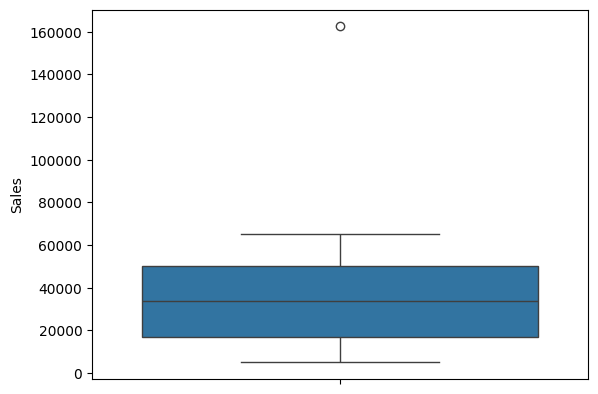

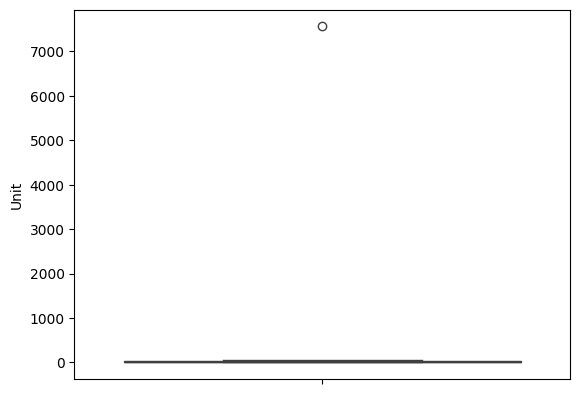

In [25]:
#descriptive statistical analysis for Sales and Unit
for i in d.describe().columns:
  sns.boxplot(d[i].dropna())
  plt.show()

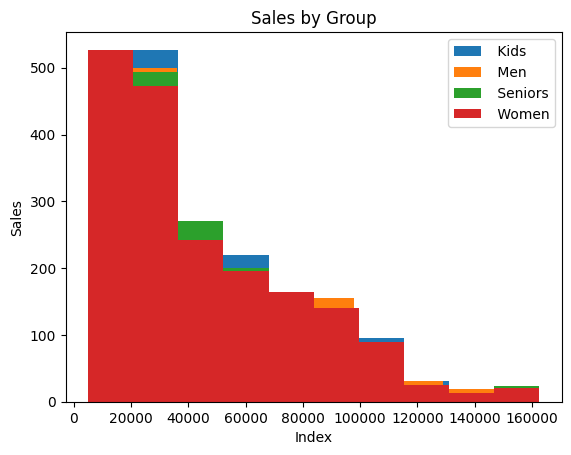

In [26]:
#Highest and Lowest sales group-wise
data.groupby('Group')['Sales'].plot(legend=True,kind="hist")

plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Sales by Group')
plt.show()

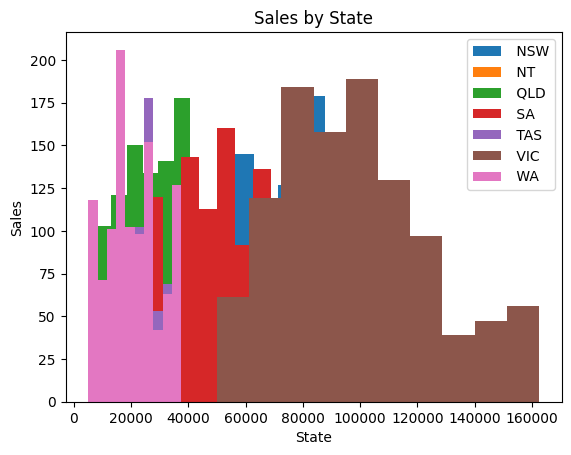

In [27]:
#Highest and Lowest sales state-wise

data.groupby('State')['Sales'].plot(legend=True,kind="hist")

plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Sales by State')
plt.show()

<Axes: xlabel='Sales'>

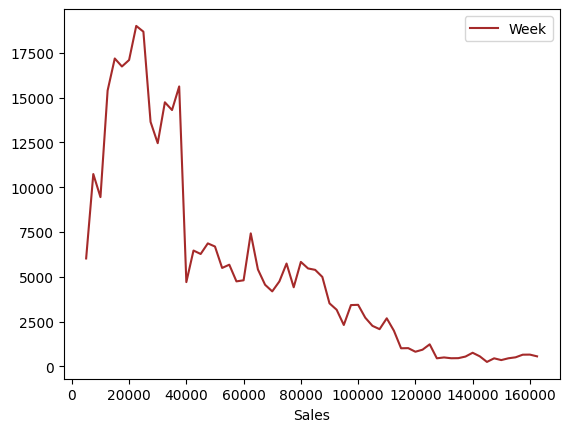

In [28]:
#Sales Weekly Report
df.groupby(['Sales']).sum().plot(kind='line', y='Week',color="brown")

<Axes: xlabel='Sales'>

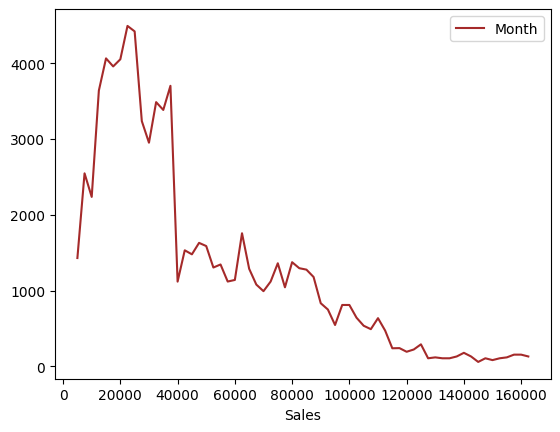

In [29]:
#Sales Monthly report
df.groupby(['Sales']).sum().plot(kind='line', y='Month',color="brown")

<Axes: xlabel='Sales'>

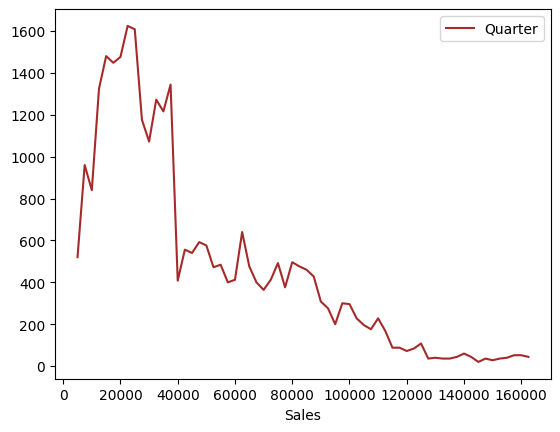

In [30]:
#Sales Quarterly Report
df.groupby(['Sales']).sum().plot(kind='line', y='Quarter',color="brown")

# **Data Visulaization:**

In [31]:
import seaborn as sns

<Axes: xlabel='Sales', ylabel='Quarter'>

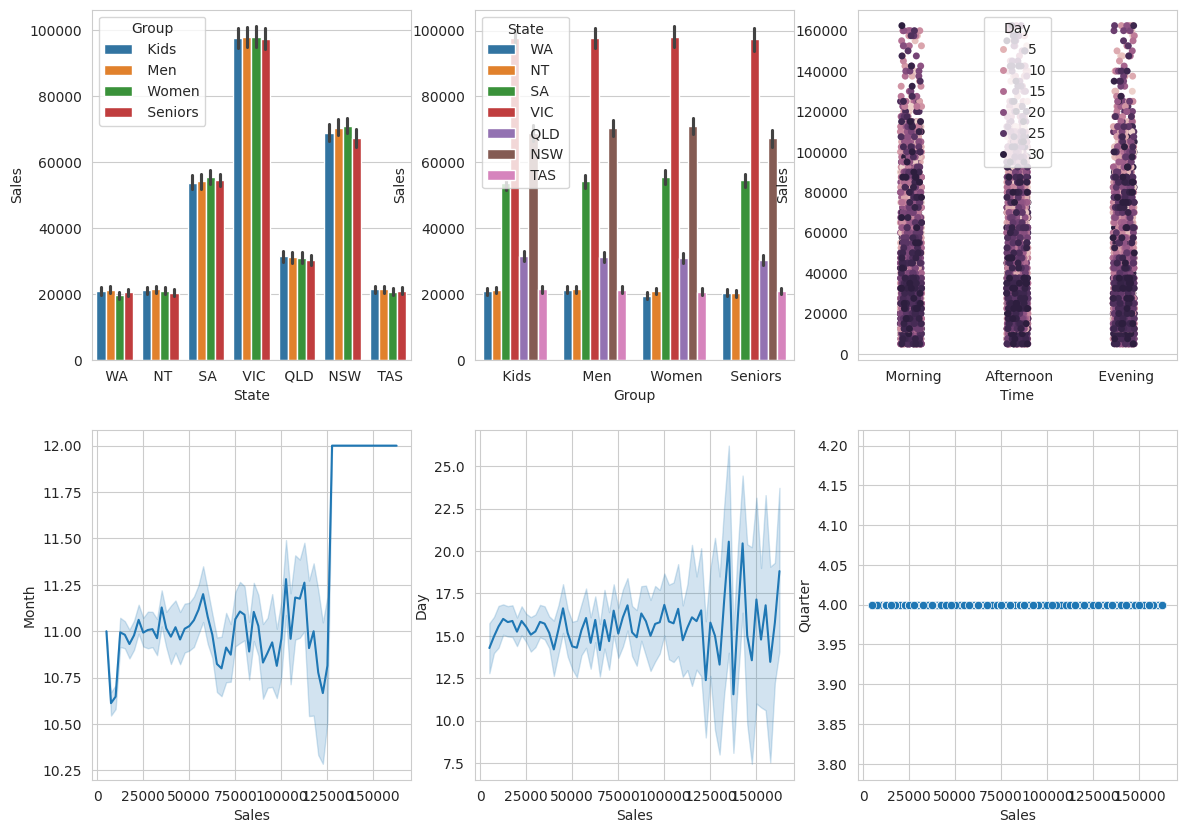

In [32]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.barplot(data=data, x="State", y="Sales", hue="Group")
plt.subplot(2,3,2)
sns.barplot(data=data, x="Group", y="Sales", hue="State")
plt.subplot(2,3,3)
sns.stripplot(data=data, x="Time", y="Sales", hue="Day")
plt.subplot(2,3,4)
sns.lineplot(data=data, x="Sales", y="Month")
plt.subplot(2,3,5)
sns.lineplot(data=data, x="Sales", y="Day")
plt.subplot(2,3,6)
sns.scatterplot(data=data, x="Sales", y="Quarter")